# Recognizing Traffic Signs
The goal of this project is to build a model capable of determining the type of traffic sign that is displayed in an image captured under different real-life conditions and showing obstructions, poor lighting, or even the sign being far away from the camera. We provide you with labeled images already splited in three files (tran/val/test) and a predefined list of signs to recognise. 

In [3]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

A subdirectory or file dataroot already exists.


--2024-07-02 21:14:18--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: 'dataroot/data_1.zip.1'

     0K .......... .......... .......... .......... ..........  0% 2.78M 11s
    50K .......... .......... .......... .......... ..........  0% 4.39M 9s
   100K .......... .......... .......... .......... ..........  0% 5.39M 8s
   150K .......... .......... .......... .......... ..........  0% 36.0M 6s
   200K .......... .......... .......... .......... ..........  0% 2.72M 7s
   250K .......... .......... .......... .......... ..........  0% 6.43M 7s
   300K .......... .......... .

In [4]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [5]:
# Load sign names
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [6]:
# Load images
import pickle
signimages = pickle.load( open( dataroot+"train.p", "rb" ) )

The image shows a Turn left ahead sign


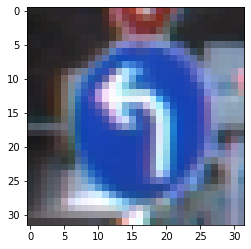

In [14]:
# Preview image
import matplotlib.pyplot as plt
import numpy as np
import cv2

inx = 20123
plt.imshow(signimages['features'][inx])
print("The image shows a {} sign".format(signnames[signimages['labels'][inx]]))

In [19]:
signimages.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [25]:
len(signimages['features'])

34799

In [38]:
signimages['sizes'][inx]

array([37, 39], dtype=uint8)

In [26]:
valid_data = pickle.load(open(dataroot + "valid.p", "rb"))
len(valid_data['features'])

4410

In [27]:
test_data = pickle.load(open(dataroot + "test.p", "rb"))
len(test_data['features'])

12630

In [31]:
# verify everything is 32x32
num_images = len(signimages['features'])
non_32x32_images = []

for i in range(num_images):
    image = signimages['features'][i]
    height, width = image.shape[:2]
    if height != 32 or width != 32:
        non_32x32_images.append(i)

if len(non_32x32_images) == 0:
    print("All images are 32x32 pixels.")
else:
    print("There are {} images that are not 32x32 pixels.".format(len(non_32x32_images)))
    print("Indices of non-32x32 images:", non_32x32_images)


All images are 32x32 pixels.


In [39]:
# category counts
from collections import Counter

label_counts = Counter(signimages['labels'])

for label, count in label_counts.items():
    print("Label {}: {}".format(label, count))


Label 41: 210
Label 31: 690
Label 36: 330
Label 26: 540
Label 23: 450
Label 1: 1980
Label 40: 300
Label 22: 330
Label 37: 180
Label 16: 360
Label 3: 1260
Label 19: 180
Label 4: 1770
Label 11: 1170
Label 42: 210
Label 0: 180
Label 32: 210
Label 27: 210
Label 29: 240
Label 24: 240
Label 9: 1320
Label 5: 1650
Label 38: 1860
Label 8: 1260
Label 10: 1800
Label 35: 1080
Label 34: 360
Label 18: 1080
Label 6: 360
Label 13: 1920
Label 7: 1290
Label 30: 390
Label 39: 270
Label 21: 270
Label 20: 300
Label 33: 599
Label 28: 480
Label 12: 1890
Label 14: 690
Label 15: 540
Label 17: 990
Label 2: 2010
Label 25: 1350
